#Project Bimbingan Karir Data Science

##1.PENGUMPULAN DATA

Dataset yang digunakan adalah dataset yang bersumber dari link berikut : https://archive.ics.uci.edu/dataset/45/heart+disease
Dataset yang dipakai adalah dataset dengan nama file "Hungarian.data" diharapkan sebelum memakai dataset tersebut anda dapat membaca
deskripsi dataset yang ada di dalam file "heart-disease.names"


##2.MENELAAH DATA

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


Import Library yang dibutuhkan

In [2]:
import pandas as pd
import re
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

###LOAD DATA

Masukan Dataset

In [3]:
dir = ('/content/gdrive/MyDrive/BIMBINGAN KARIR/hungarian.data')

Buat Literasi Untuk Membaca dataset

In [4]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [5]:
data = itertools.takewhile(
lambda x: len(x) == 76,
(' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

In [6]:
df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [7]:
#Menampilkan Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

melakukan penghapusan fitur dikarenakan pada dataset ini nilai null disimbolkan dengan angka -9.0

In [8]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

mengubah tipe data file dataset menjadi tipe data float sesuai dengan nilai null yaitu -9.0

In [9]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

##3.VALIDASI DATA

Tahap bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya

mengubah nilai -9.0 menjadi nilai null value sesuai dengan deskripsi dataset

In [10]:
df.replace(-9.0, np.nan, inplace=True)

In [11]:
#Menghitung Jumlah Missing Value
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

##4.Menentukan Object

Memilih 14 fitur yang akan digunakan sesuai dengan deskripsi dataset|

In [12]:
df_selected = df.iloc[:, [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]]
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [13]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset

In [14]:
column_mapping = {
2: 'age',
3: 'sex',
8: 'cp',
9: 'trestbps',
11: 'chol',
15: 'fbs',
18: 'restecg',
31: 'thalach',
37: 'exang',
39: 'oldpeak',
40: 'slope',
43: 'ca',
50: 'thal',
57: 'target'
}
df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-14-a9bc0ddf4e0b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [15]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [16]:
#Menghitung Jumlah Fitur Dalam Dataset
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

##5.MEMBERSIHKAN DATA

In [17]:
#menghitung jumlah nul pada Data set
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

fitur yang hampir 90% datanya memiliki nilai null sehingga perlu dilakukan
penghapusan fitur menggunakan fungsi drop

In [18]:
columns_to_drop = ['ca', 'slope','thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

Dikarenakan masih ada nilai null dibeberapa kolom fitur maka akan dilakukan pengisian nilai null menggunakan nilai rata rata di setiap kolomnya

In [19]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

In [20]:
#mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
               'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [21]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [22]:
#Melakukan cek duplikasi data
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [23]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [24]:
#Menghapus Data yang Duplicate
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [25]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [26]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

Tahap ini Untuk Mencari Korelasi Antar Fitur

In [27]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


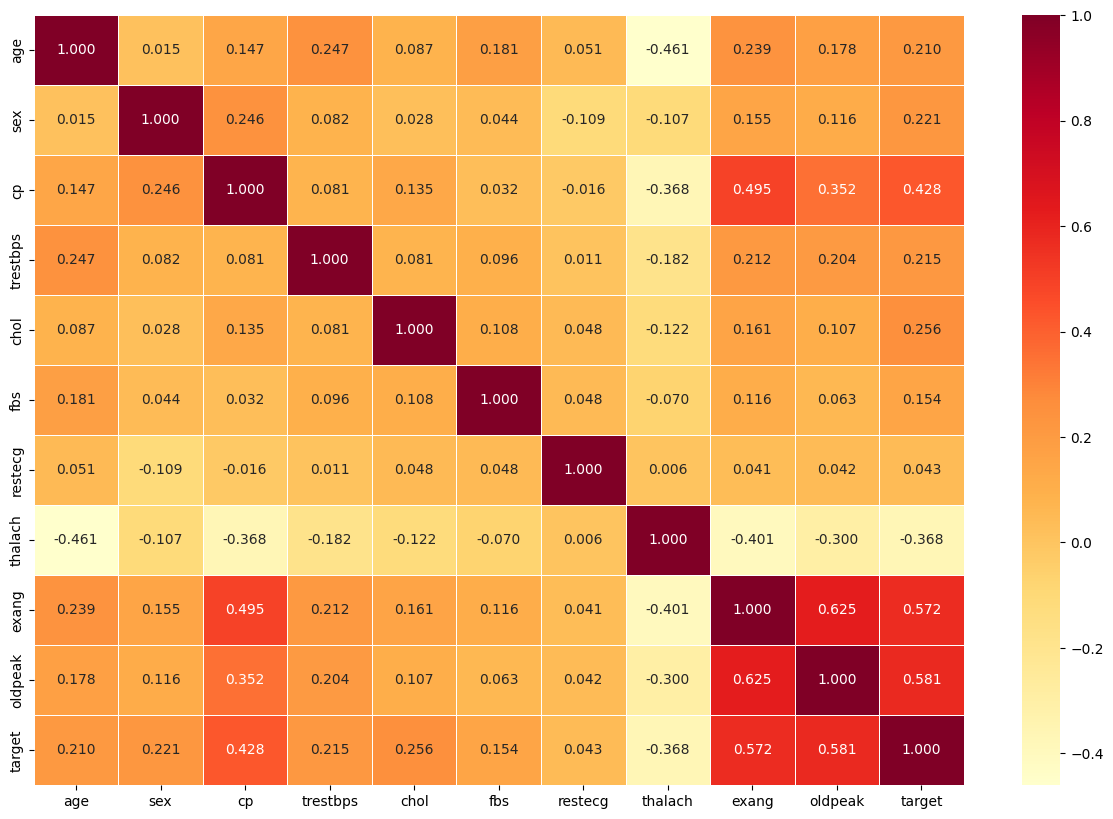

In [28]:
# Menghitung korelasi
cor_mat = dfClean.corr()

# Mengatur ukuran plot
fig, ax = plt.subplots(figsize=(15, 10))

# Membuat heatmap dengan warna yang menarik
sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt=".3f", cmap="YlOrRd")

# Menampilkan plot
plt.show()

##5.Kontruksi Data

In [29]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [30]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [31]:
#memisahkan Fitur dan target
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

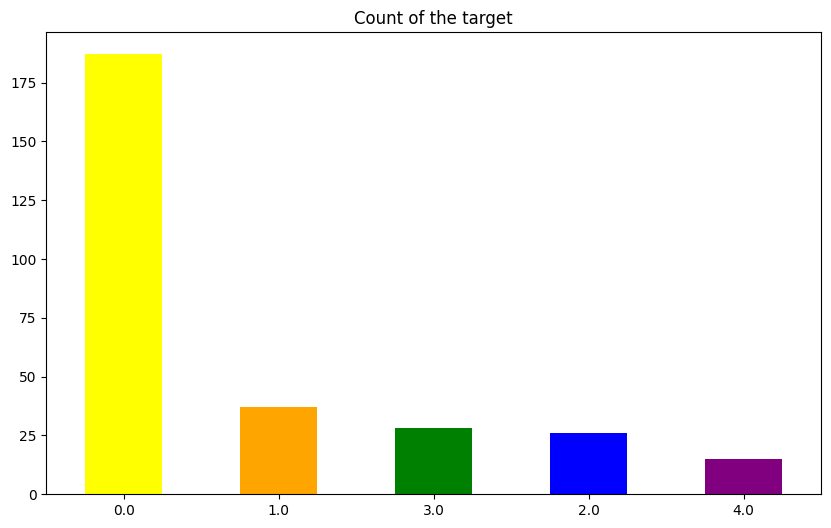

In [32]:
#Menampilkan Persebaran jumlah target
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['yellow', 'orange', 'green', 'blue', 'purple'])
plt.title("Count of the target")
plt.xticks(rotation=0);

Grafik di atas menunjukkan ketidakseimbangan dalam jumlah target, sehingga perlu dilakukan penyeimbangan terlebih dahulu. Penyeimbangan target dapat dilakukan melalui dua cara, yaitu oversampling dan undersampling. Oversampling diterapkan ketika jumlah dataset terlalu sedikit, sedangkan undersampling digunakan ketika jumlah data terlalu banyak.

Dalam konteks ini, kita akan menerapkan oversampling karena jumlah data kita terbatas. Salah satu metode oversampling yang akan digunakan adalah SMOTE (Synthetic Minority Over-sampling Technique).

In [33]:
# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

In [34]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [35]:
new_df1 = pd.DataFrame(data=y)

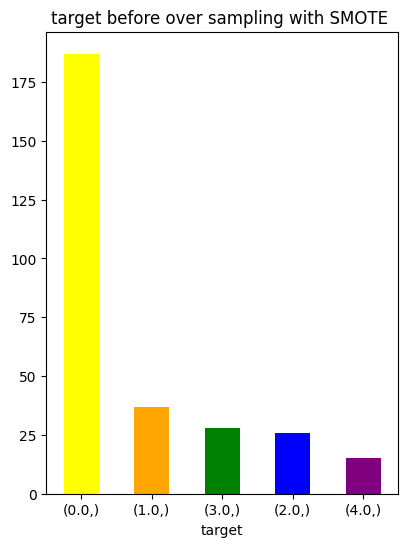

In [36]:
#Nilai target sebelum di seimbangkan
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=[ 'yellow', 'orange', 'green', 'blue', 'purple'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);

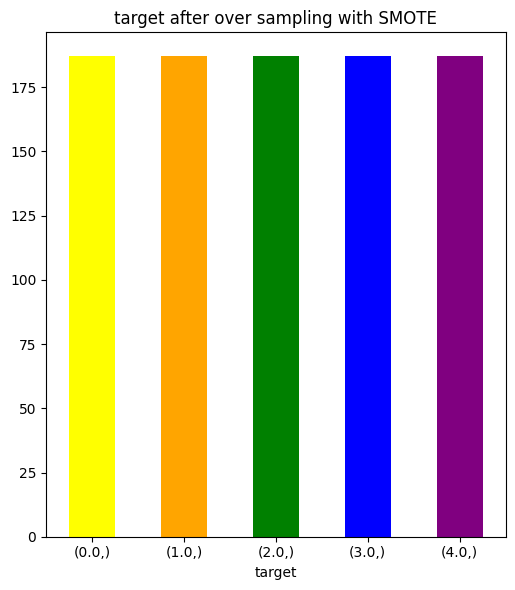

In [37]:
#Nilai target yang sudah di seimbangkan
plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['yellow', 'orange', 'green', 'blue', 'purple'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);
plt.tight_layout()
plt.show()

In [38]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [39]:
# over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

In [40]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Dalam deskripsi di atas, bisa dilihat bahwa terdapat variasi yang signifikan dalam rentang nilai standar deviasi dari setiap fitur dalam dataset. Oleh karena itu, diperlukan tindakan normalisasi atau standarisasi untuk mengurangi jarak antara standar deviasi setiap kolom.

In [41]:
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normal)

935

In [42]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah dilakukan normalisasi pada fitur, selanjutnya kita perlu membagi fitur dan target menjadi data train dan test.

##7.Modeling

sebelum melakukan modeling kita harus membagi data train test terlebih dahulu

In [43]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)
# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

In [44]:
def evaluation(Y_test,Y_pred):
  acc = accuracy_score(y_test,y_pred)
  rcl = recall_score(Y_test,Y_pred,average = 'weighted')
  f1 = f1_score(Y_test,Y_pred,average = 'weighted')
  ps = precision_score(Y_test,Y_pred,average = 'weighted')
  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
}
  return print(metric_dict)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

### KNN

In [46]:
KNeighborsClassifier(n_neighbors=3)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [47]:
y_pred_knn = knn_model.predict(X_test_normal)

In [48]:
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



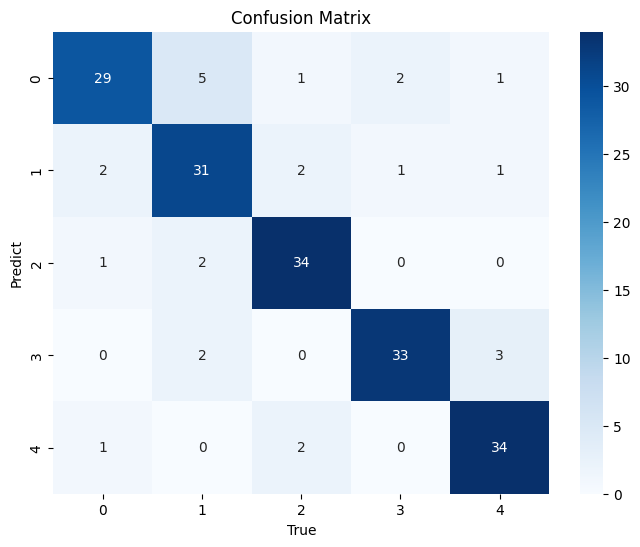

In [49]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###RANDOM FOREST

In [50]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [51]:
y_pred_rf = rf_model.predict(X_test_normal)

In [52]:
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



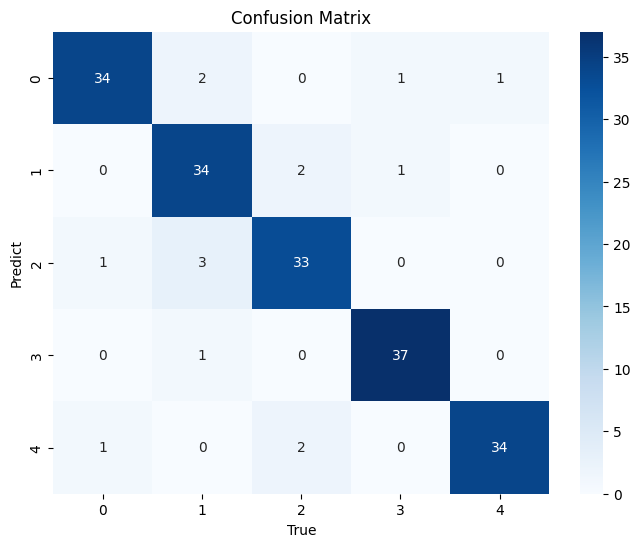

In [53]:
cm = confusion_matrix(y_test_normal, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###XG BOOST

In [54]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [55]:
y_pred_xgb = xgb_model.predict(X_test_normal)

In [56]:
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



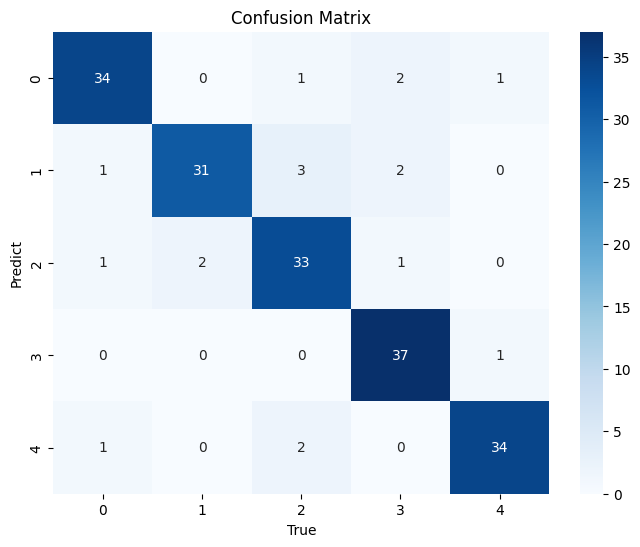

In [57]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###NAIVE BAYES

In [58]:
# Membuat model Naive Bayes
nb_model = GaussianNB()

# Melatih model dengan data yang telah dinormalisasi
nb_model.fit(X_train_normal, y_train_normal)

GaussianNB()

In [59]:
y_pred_nb = nb_model.predict(X_test_normal)

In [60]:
# Evaluate the Naive Bayes model
print("\nNaive Bayes Model:")
accuracy_nb_normal = round(accuracy_score(y_test_normal, y_pred_nb), 3)
print("Accuracy:", accuracy_nb_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_nb))



Naive Bayes Model:
Accuracy: 0.519
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75        38
         1.0       0.55      0.59      0.57        37
         2.0       0.39      0.41      0.40        37
         3.0       0.50      0.18      0.27        38
         4.0       0.43      0.65      0.52        37

    accuracy                           0.52       187
   macro avg       0.52      0.52      0.50       187
weighted avg       0.52      0.52      0.50       187



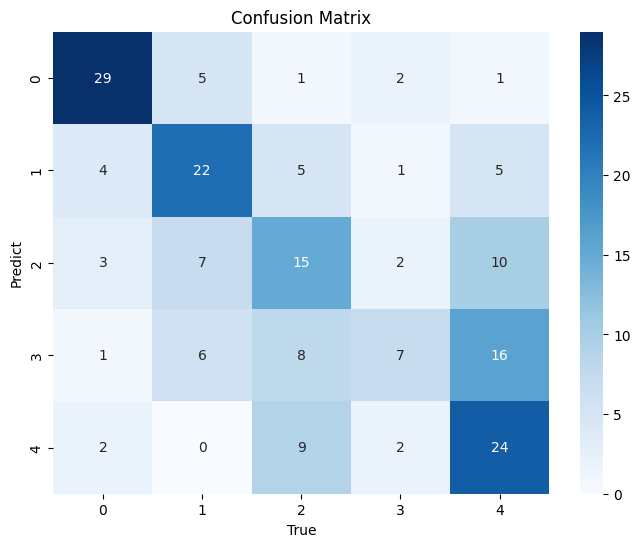

In [61]:
cm = confusion_matrix(y_test_normal, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

##8.Modeling Tunning + Normalization + Oversample

Pada pembuatan model kali ini masih menggunakan algoritma yang sama (KNN, Random Forest, dan XGBoost), namun data yang digunakan
adalah data yang sudah dilakukan TunNIng Parameter, Normalisasi, dan Oversample.

In [62]:

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

###KNN

In [63]:
knn_model = KNeighborsClassifier()
param_grid = {
"n_neighbors": range(3, 21),
"metric": ["euclidean", "manhattan", "chebyshev"],
"weights": ["uniform", "distance"],
"algorithm": ["auto", "ball_tree", "kd_tree"],
"leaf_size": range(10, 61),
}
knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

In [64]:
knn_model.fit(X_train_normal, y_train_normal)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'leaf_size': range(10, 61),
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev'],
                                        'n_neighbors': range(3, 21),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [65]:
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'leaf_size': 12, 'algorithm': 'auto'}


In [66]:
y_pred_knn = knn_model.predict(X_test_normal)

In [67]:
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.86      0.86      0.86        37
         2.0       0.92      0.92      0.92        37
         3.0       0.97      0.97      0.97        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.93       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187



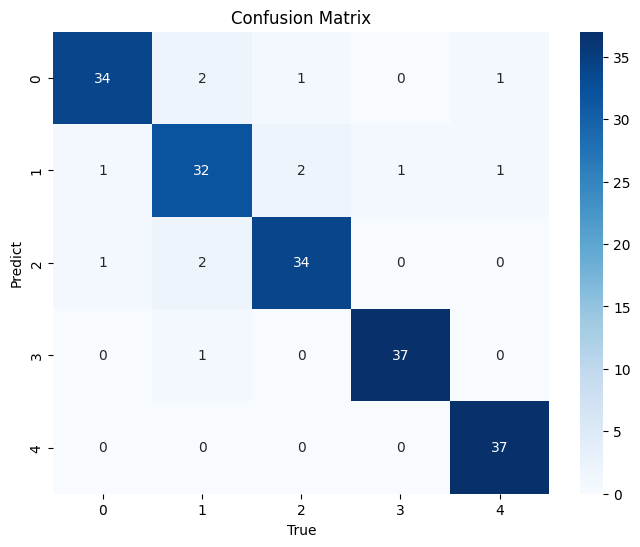

In [68]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###RANDM FOREST

In [69]:
rf_model = RandomForestClassifier()

In [70]:
param_grid = {
  "n_estimators": [100, 200],
  "max_depth": [ 10, 15],
  "min_samples_leaf": [1, 2],
  "min_samples_split": [2, 5],
  "max_features": ["sqrt", "log2"],
  "random_state": [42, 100, 200]
}

In [71]:
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)
rf_model.fit(X_train_normal, y_train_normal)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200],
                                        'random_state': [42, 100, 200]})

In [72]:
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [73]:
y_pred_rf = rf_model.predict(X_test_normal)

In [74]:
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.87      0.89      0.88        37
         2.0       0.86      0.86      0.86        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



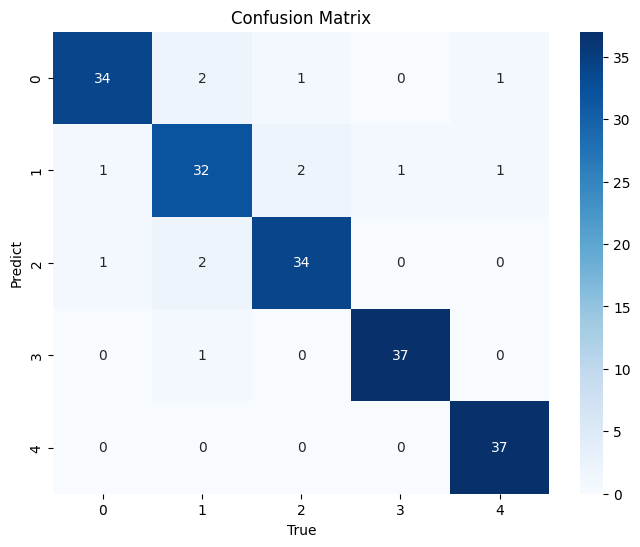

In [75]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###XG BOOST

In [76]:
xgb_model = XGBClassifier()
param_grid = {
"max_depth": [3, 5, 7],
"learning_rate": [0.01, 0.1],
"n_estimators": [100, 200],
"gamma": [0, 0.1],
"colsample_bytree": [0.7, 0.8],
}
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

In [77]:
xgb_model.fit(X_train_normal, y_train_normal)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200]})

In [78]:
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [79]:
y_pred_xgb = xgb_model.predict(X_test_normal)

In [80]:
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        38
         1.0       0.89      0.86      0.88        37
         2.0       0.89      0.84      0.86        37
         3.0       0.93      1.00      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



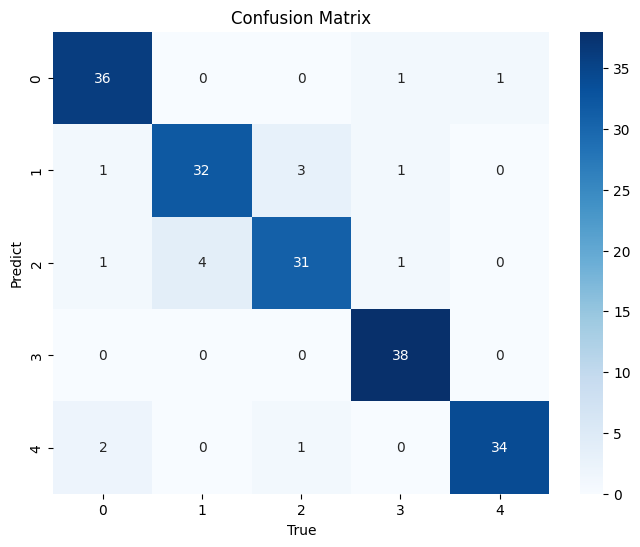

In [81]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###NAIVE BAYES

In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Membuat model Naive Bayes
nb_model = GaussianNB()

# Parameter grid untuk tuning
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Melakukan GridSearchCV
nb_model_tuned = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', cv=5)
nb_model_tuned.fit(X_train_normal, y_train_normal)

# Print parameter terbaik setelah tuning
print("Best Parameters:", nb_model_tuned.best_params_)


Best Parameters: {'var_smoothing': 1e-09}


In [83]:
print("Best Parameters:", nb_model_tuned.best_params_)

# Membuat prediksi menggunakan model yang telah dituning
y_pred_nb_tuned = nb_model_tuned.predict(X_test_normal)


Best Parameters: {'var_smoothing': 1e-09}


In [84]:
# Evaluate the Naive Bayes model
print("\nXGBoost Model:")
accuracy_nb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_nb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        38
         1.0       0.89      0.86      0.88        37
         2.0       0.89      0.84      0.86        37
         3.0       0.93      1.00      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



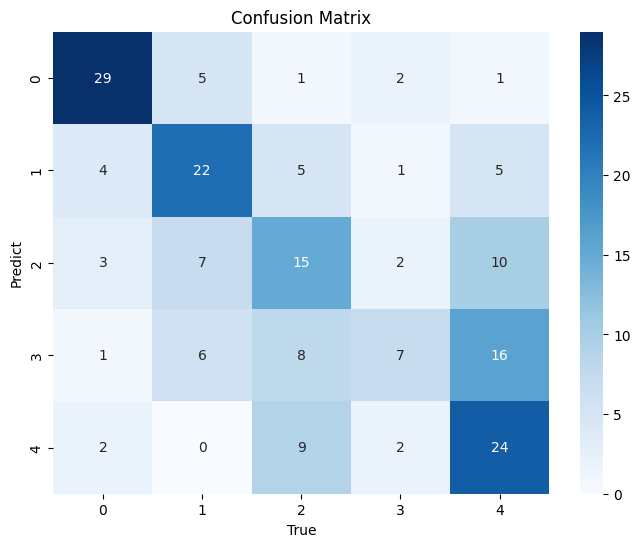

In [85]:
cm = confusion_matrix(y_test_normal, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

##8.Evaluasi

Selanjutnya kita akan melakukan evaluasi data sekaligus membandingkan antar algoritma guna dengan tujuan mengetahui jenis model
algoritma yang menghasilkan hasil akurasi terbaik.

In [86]:
import matplotlib.pyplot as plt

In [87]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                    'XGBoost','Naive Bayes'], 'Accuracy': [accuracy_knn_smote_normal*100,
                    accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100,accuracy_nb_normal*100]})

model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4
3,Naive Bayes,51.9


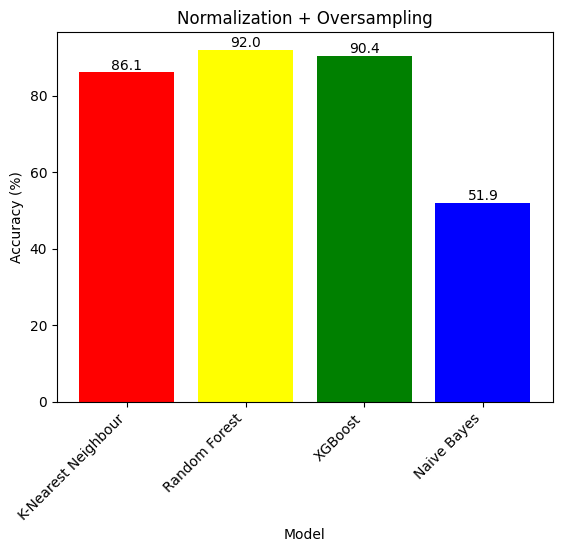

In [88]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red','yellow', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [89]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                    'XGBoost','Naive Bayes'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
                    accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100,accuracy_nb_smote_normal_Tun*100]})

model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,93.0
1,Random Forest,91.4
2,XGBoost,91.4
3,Naive Bayes,91.4


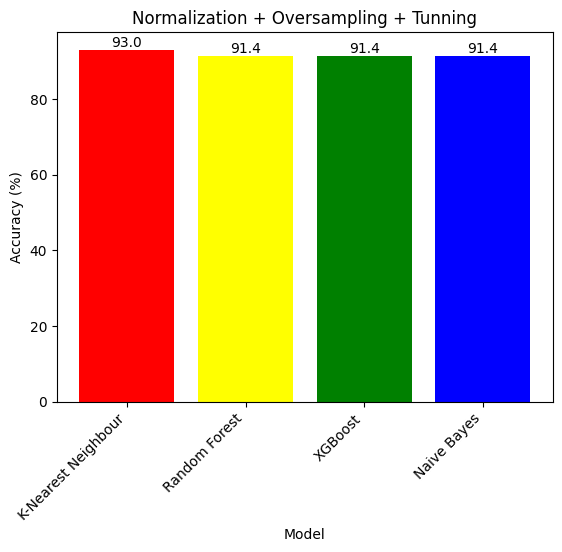

In [90]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red','yellow' ,'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [96]:
# Data frame
model_compBest = pd.DataFrame({
'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample',
          'XGB OverSample Standarization Tunning'],
'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100,
            accuracy_xgb_smote_normal_Tun*100]
})

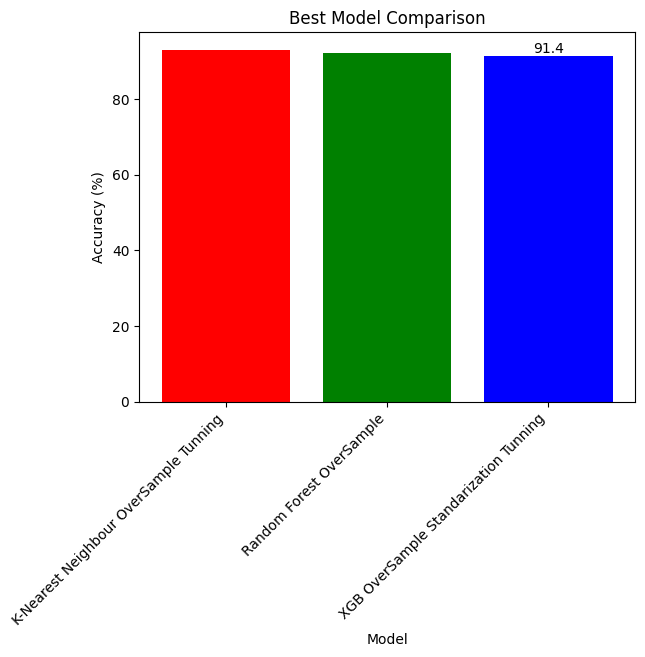

In [97]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

##10.Kesimpilan

Dari penelitian diatas setelah melakukan pemodelan dengan algoritma KNN, Random Forest, dan XGBoost dengan berbagai penanganan data
antara lain menggunakan random over sampling SMOTE untuk penanganan imbalance data, RandomSearchCV untuk tunning, dan Normalisasi
data. Dapat disimpulkan bahwa klasifikasi menggunakan Random Over Sampling SMOTE pada model KNN menghasilkan akurasi 75.4 %,
model Random Forest dengan akurasi yang dihasilkan yaitu 92%, dan model XGBoots menghasilkan akurasi 90.4%. Disamping itu bila
klasifikasi menggunakan data yang sudah dilakukan normalisasi dan Random Over Sampling SMOTE pada model KNN menghasilkan akurasi
86.1%, model Random Forest menghasilkan akurasi 92%, dan model XGBoots menghasilkan akurasi 90.4%. Dan pada klasifikasi menggunakan
data yang telah dilakukan tunning RandomSearchCV, normalisasi, dan Random Over Sampling SMOTE dalam model KNN menghasilkan akurasi
93%, pada model Random Forest menghasilkan akurasi 87.7%. dan model XGBoots menghasilkan akurasi 92%. Oleh karena itu, dalam
penanganan data yang optimal untuk mengatasi ketidakseimbangan data adalah dengan menggunakan metode random Oversampling SMOTE
sekaligus yang dilengkapi dengan tuning menggunakan RandomSearchCV dan normalisasi data, memberikan hasil yang signifikan dalam
meningkatkan akurasi model klasifikasi khususnya pada model KNN dan XGBoots, namun hal itu tidak terjadi pada model Random Forest yang

mengalami penurunan akurasi yang signifikan. Secara keseluruhan, penanganan dalam ketidakseimbangan data dengan menggunakan tunning
parameter, normalisasi, dan oversampling dapat memberikan dampak signifikan terhadap performa model klasifikasi. Pemilihan model terbaik
dan parameter optimal dapat meningkatkan akurasi dan kinerja model secara keseluruhan.